In [843]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [844]:
df = pd.read_csv("kidiq.csv", sep=";")

Data description

```
kid_score Child's IQ score
        mom_hs Indicator for whether the mother has a high school degree
        mom_iq Mother's IQ score
        mom_work 1 = did not work in first three years of child's life
                 2 = worked in 2nd or 3rd year of child's life
                 3 = worked part-time in first year of child's life
                 4 = worked full-time in first year of child's life
        mom_age Mother's age

```


In [845]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [846]:
df.corr()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
kid_score,1.000000,0.035672,0.301510,-0.024535,0.095566
mom_hs,0.035672,1.000000,0.206142,0.045817,0.244039
mom_iq,0.301510,0.206142,1.000000,0.010575,-0.012764
mom_work,-0.024535,0.045817,0.010575,1.000000,0.152207
mom_age,0.095566,0.244039,-0.012764,0.152207,1.000000


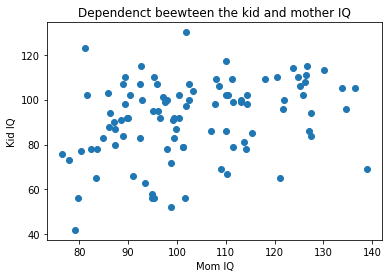

In [847]:
plt.scatter(df.mom_iq.values, df.kid_score.values)
plt.title("Dependenct beewteen the kid and mother IQ")
plt.ylabel("Kid IQ")
plt.xlabel("Mom IQ")
plt.show()

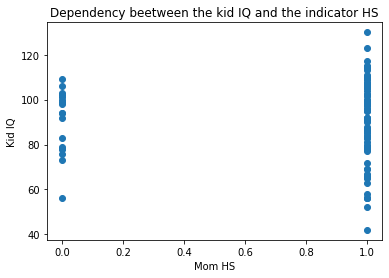

In [848]:
plt.scatter( df.mom_hs.values, df.kid_score.values)
plt.title('Dependency beetween the kid IQ and the indicator HS')
plt.ylabel("Kid IQ")
plt.xlabel("Mom HS")
plt.show()

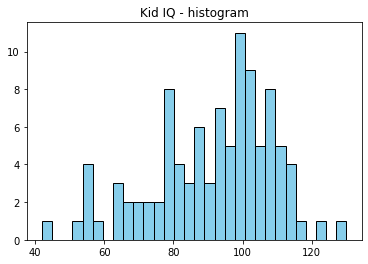

In [849]:
plt.hist(df.kid_score.values, bins=30, color='skyblue', edgecolor='black')
plt.title('Kid IQ - histogram')
plt.show()

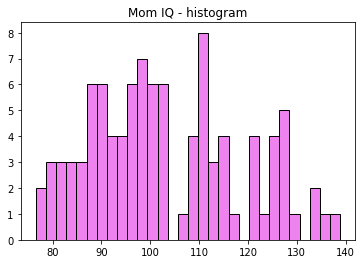

In [850]:
plt.hist(df.mom_iq.values, bins=30, color='violet', edgecolor='black')
plt.title('Mom IQ - histogram')
plt.show()

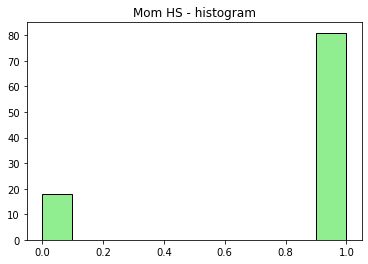

In [851]:
plt.hist(df.mom_hs.values, color='lightgreen', edgecolor='black')
plt.title('Mom HS - histogram')
plt.show()

In [852]:
from cmdstanpy import CmdStanModel
R = 1000
model_1=CmdStanModel(stan_file='prior1.stan')

model_1_samp = model_1.sample(data = {'N': df.shape[0], 'mom_iq': df["mom_iq"].values},
                     iter_sampling=R,
                     iter_warmup=1,
                     chains=1,
                     fixed_param=True,
                     seed=2904)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [853]:
print(model_1_samp.stan_variable("beta0"))

[  0.       79.7463  -18.5757    0.        0.       77.8399  112.173
   0.        0.        0.        0.       43.4574    0.        0.
 118.031     0.        0.        0.       68.1511    0.        0.
   0.       76.6392  113.394     0.        0.      104.831   130.637
  74.0567    0.      114.038   116.375    62.9061  129.03     96.9963
 119.906     0.        0.        0.        0.      136.412    50.5082
   0.      117.258    95.3211    0.        0.      111.887    63.7219
 111.176   131.05    103.707     0.       52.7431   93.8794    0.
   0.        0.        0.        0.        0.      124.234     0.
   0.      172.89      0.        0.        0.       90.7233    0.
   0.        0.       66.3122  189.552     0.        0.        0.
  55.6722    0.      103.833     0.       86.5541    0.        0.
  39.6946    0.      148.997     0.        0.       84.8571   49.4567
   0.      104.701     0.      171.402   132.047     0.        0.
   0.        0.       47.7735  123.543   144.858   189

In [854]:
print(model_1_samp.stan_variable("beta1"))

[ 0.00000e+00  2.11598e+00  9.83194e-01  0.00000e+00  0.00000e+00
  1.88169e-01 -2.35982e-01  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00 -1.21036e-01  0.00000e+00  0.00000e+00  2.73636e+00
  0.00000e+00  0.00000e+00  0.00000e+00 -2.61543e-01  0.00000e+00
  0.00000e+00  0.00000e+00  7.44192e-01  1.34955e+00  0.00000e+00
  0.00000e+00  1.03876e+00 -5.56921e-02  1.91485e+00  0.00000e+00
 -4.00329e-01  8.68341e-01 -1.01311e-01  2.61592e-01  1.12962e+00
 -7.52490e-01  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  9.22906e-03  5.47236e-01  0.00000e+00 -1.20645e+00  8.56725e-01
  0.00000e+00  0.00000e+00  2.50607e+00  1.63213e+00  9.80364e-01
  1.74184e+00  1.10434e+00  0.00000e+00  3.01486e-01  2.10780e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00 -2.17778e+00  0.00000e+00  0.00000e+00  1.10573e+00
  0.00000e+00  0.00000e+00  0.00000e+00  1.78313e+00  0.00000e+00
  0.00000e+00  0.00000e+00  7.40257e-01 -7.76805e-01  0.00000e+00
  0.00000e

In [855]:
yields_pred_prior = model_1_samp.stan_variable("kid_score")
yields_pred_prior_means = np.mean(yields_pred_prior, axis=0)

In [856]:
print(model_1_samp.stan_variable("sigma"))

[0.00000e+00 1.52000e+00 4.93010e+00 0.00000e+00 0.00000e+00 1.47060e+00
 3.86705e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.03927e+01
 0.00000e+00 0.00000e+00 7.59872e+00 0.00000e+00 0.00000e+00 0.00000e+00
 3.48538e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.75848e+01 1.25517e+01
 0.00000e+00 0.00000e+00 1.10797e+01 1.59482e+01 2.49382e+00 0.00000e+00
 7.55569e+00 1.90069e+01 8.13237e+00 2.81300e+00 2.01322e+01 9.45914e-02
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 6.02418e+00 3.38117e-01
 0.00000e+00 2.12638e+01 5.64226e+00 0.00000e+00 0.00000e+00 3.29036e+00
 3.82657e+00 4.36310e+01 1.25447e+00 4.61455e+00 0.00000e+00 7.98901e+00
 1.39590e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 3.70202e+00 0.00000e+00 0.00000e+00 6.30403e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.25029e+00 0.00000e+00 0.00000e+00 0.00000e+00
 4.90288e+00 3.85067e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.46364e+01
 0.00000e+00 1.58755e+00 0.00000e+00 1.08508e+01 0.

In [857]:
print(yields_pred_prior_means)

[84.67629946 75.44047393 82.4808319  78.19701675 76.52544145 81.18733844
 89.19851065 84.9605445  72.93664893 76.68656126 75.4213327  77.22838706
 75.2609406  82.31036649 78.49782223 83.95593349 82.61155829 81.44848047
 88.54406849 77.8450691  81.3826966  86.08345524 77.77024063 78.19261049
 77.90266923 84.84924631 78.38833379 77.83338831 73.31990996 82.26403278
 81.12528112 79.24343175 83.19504814 81.17910425 77.88394736 76.78728228
 77.10545109 81.10538213 74.45040276 75.20109409 78.98359664 87.06742689
 73.60154429 85.51506639 74.23490497 86.57423729 72.25363462 82.07749467
 81.31364842 77.93055678 79.03905287 85.41872378 76.95693731 76.83998614
 78.74367501 72.31084636 77.42000321 73.48880463 71.53313175 81.99787481
 82.01882598 82.35308455 78.38953653 78.69935585 78.95254961 78.37582491
 77.05993116 75.22739249 75.0971152  74.7331407  75.01717026 84.18576061
 85.62695108 81.41701654 75.99819663 74.66762667 82.61102531 72.60073661
 77.46490951 73.75427501 74.23292752 77.61236518 81

In [858]:
print(model_1_samp.summary())

                Mean   MCSE  StdDev    5%    50%    95%  N_Eff  N_Eff/s  R_hat
name                                                                          
lp__            0.00    NaN    0.00  0.00  0.000    0.0    NaN      NaN    NaN
beta0          50.00  1.900   58.00  0.00  3.900  150.0  930.0  13000.0    1.0
beta1           0.28  0.026    0.79 -0.82  0.000    1.9  930.0  13000.0    1.0
sigma           5.00  0.290    8.30  0.00  0.095   21.0  830.0  11000.0    1.0
kid_score[1]   85.00  4.200  127.00 -6.40  0.000  348.0  905.0  12228.0    1.0
...              ...    ...     ...   ...    ...    ...    ...      ...    ...
kid_score[95]  86.00  4.400  131.00 -6.60  0.000  354.0  904.0  12220.0    1.0
kid_score[96]  76.00  3.500  107.00  0.00  0.000  289.0  913.0  12344.0    1.0
kid_score[97]  74.00  3.500  102.00  0.00  0.000  280.0  849.0  11472.0    1.0
kid_score[98]  79.00  3.800  112.00  0.00  0.000  307.0  887.0  11985.0    1.0
kid_score[99]  81.00  3.900  117.00  0.00  0.000  31

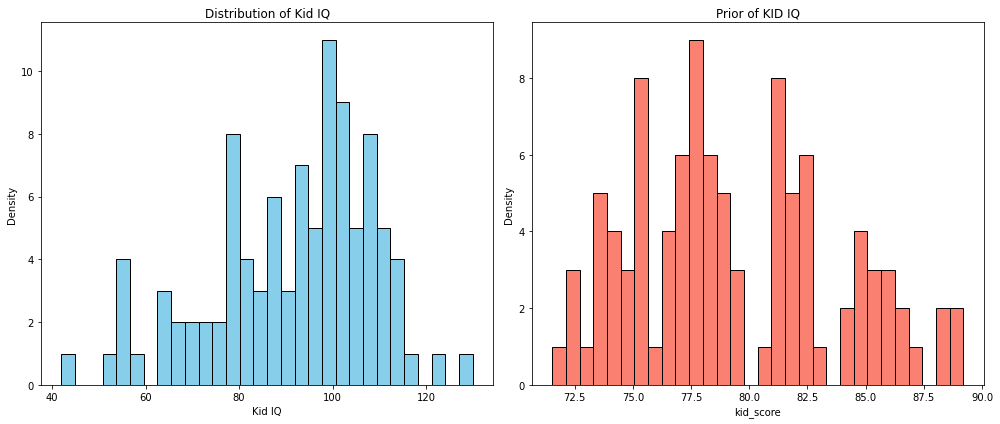

In [859]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(df.kid_score.values, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Kid IQ')
axs[0].set_xlabel('Kid IQ')
axs[0].set_ylabel('Density')

axs[1].hist(yields_pred_prior_means, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Prior of KID IQ')
axs[1].set_xlabel('kid_score')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

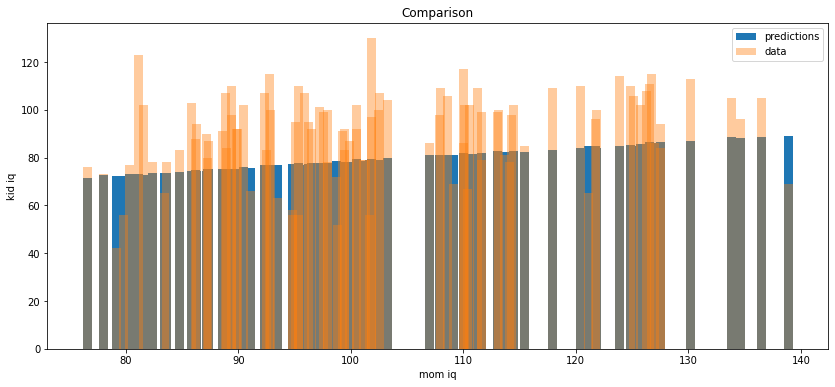

In [860]:
plt.figure(figsize=(14,6))
plt.bar(df.mom_iq.values,yields_pred_prior_means, label="predictions")
plt.bar(df.mom_iq.values,df.kid_score.values, label="data", alpha =0.4)
plt.title("Comparison")
plt.ylabel("kid iq")
plt.xlabel("mom iq")
plt.legend()
plt.show()

In [861]:
print(df["kid_score"].values)

[ 65  98  85  83 115  98  69 106 102  95  91  58  84  78 102 110 102  99
 105 101 102 115 100  87  99  96  72  78  77  98  69 130 109 106  92 100
 107  86  90 110 107 113  65 102 103 111  42 100  67  92 100 110  56 107
  97  56  95  78  76  86  79  81  79  79  56  52  63  80  87  88  92 100
  94 117 102 107  99  73  56  78  94 110 109  86  92  91 123 102 105 114
  96  66 104 108  84  83  83  92 109]


In [862]:
R = 1000
model=CmdStanModel(stan_file='model1.stan')

model_1_fit = model.sample(data = {'N': df.shape[0], 'mom_iq': df["mom_iq"].values, 'kid_score': df["kid_score"].values},
                     iter_sampling=R,
                     chains=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [863]:
yields_pred = model_1_fit.stan_variable("kid_score_pred")
yields_pred_means = np.mean(yields_pred, axis=0)
print(yields_pred_prior)

[[  0.       0.       0.     ...   0.       0.       0.    ]
 [336.965  267.136  323.24   ... 258.789  291.296  308.761 ]
 [ 97.5454  70.7995  96.4336 ...  66.9317  89.1249  90.2163]
 ...
 [286.331  229.366  267.573  ... 244.263  269.764  263.412 ]
 [  0.       0.       0.     ...   0.       0.       0.    ]
 [228.122  188.243  238.943  ... 154.8    187.464  250.411 ]]


In [864]:
print(model_1_fit.stan_variable("beta0"))

[ 58.6744  59.733   61.2685  60.9102  61.9413  62.8404  62.7703  60.9814
  41.4602  44.8898  59.8827  59.8827  57.4446  66.1336  66.5508  58.5134
  58.0342  56.4423  57.0084  43.8967  56.4807  56.1228  53.2521  50.7882
  43.1171  55.3075  60.488   60.8915  57.4031  48.2261  63.0371  70.3225
  55.9879  54.7652  41.6423  48.1859  42.5731  61.6694  70.2236  50.7134
  47.7512  61.1796  25.9928  26.5649  25.9247  26.3673  79.4087  79.4299
  79.5324  62.3407  57.76    58.0647  59.187   50.058   48.9758  64.2426
  55.5688  54.291   35.021   51.7585  48.7035  57.3382  63.0473  66.1518
  52.0398  44.487  100.775   98.7794  99.4149 100.42   101.037  102.186
  30.4461  38.9795  59.4253  54.0469  67.8819  55.2493  47.0054  68.2596
  80.3905  77.9276  71.7664  46.6463  47.8361  47.8031  43.3152  75.3345
  81.6208  75.9676  58.6057  58.3533  53.1477  60.1322  57.0562  58.0992
  52.2642  57.545   56.6877  57.5032  46.1665  47.0058  58.3225  53.8278
  50.3483  52.3953  49.9823  46.5734  46.1884  46.20

In [865]:
print(model_1_fit.stan_variable("beta1"))

[ 0.326527   0.281608   0.272516   0.271845   0.282215   0.28044
  0.274966   0.298122   0.462647   0.492342   0.342853   0.342853
  0.304079   0.228061   0.239487   0.322118   0.352437   0.344353
  0.347667   0.456161   0.352694   0.341563   0.380712   0.360306
  0.474611   0.36401    0.294665   0.295736   0.342628   0.41913
  0.262753   0.212547   0.360663   0.330614   0.474458   0.423194
  0.484195   0.291554   0.201041   0.4038     0.427187   0.307203
  0.627915   0.625845   0.640444   0.608645   0.12569    0.109699
  0.126273   0.245737   0.286879   0.297474   0.310922   0.377648
  0.380823   0.277405   0.36026    0.365866   0.53229    0.396022
  0.415172   0.342291   0.24883    0.25182    0.397845   0.466699
 -0.0760839 -0.0684082 -0.0732676 -0.0712167 -0.0920999 -0.0738494
  0.570411   0.505068   0.292575   0.352097   0.229478   0.363244
  0.407339   0.201299   0.124913   0.116235   0.169763   0.410142
  0.447748   0.441414   0.431566   0.178395   0.116309   0.152988
  0.30293  

In [866]:
print(model_1_fit.stan_variable("sigma"))

[17.9143 15.767  15.757  16.3728 15.8739 15.5182 17.7584 17.7945 17.0507
 17.0503 15.2016 15.2016 15.3576 17.0292 16.9918 15.7423 15.9542 15.9363
 15.9421 15.1912 15.7695 17.9738 16.3446 16.4776 16.5771 17.1646 17.0026
 16.9863 16.6538 15.2552 15.9149 16.9515 16.9109 16.4502 17.7434 15.4583
 15.3427 15.0105 17.8231 14.8597 14.4238 18.7837 15.4176 15.4143 15.7741
 15.8421 16.7381 15.8518 15.8382 15.9049 17.141  16.9714 16.9771 17.2843
 15.8609 16.4951 16.1702 15.4022 17.1156 17.7193 16.7685 15.0309 16.0454
 14.9298 18.5091 16.0809 19.0823 19.2104 19.3212 19.2688 19.3866 19.4171
 14.908  20.5294 13.5155 14.4114 16.6295 17.4801 15.8447 17.1691 18.711
 17.0575 16.652  15.0526 14.927  14.9103 14.8176 17.5387 15.3412 15.7114
 15.578  15.8807 17.9535 17.7168 16.9091 16.8531 15.5853 16.5763 16.5313
 15.7391 17.0581 15.8934 16.6101 15.5314 16.8385 18.8745 16.9198 17.2054
 15.144  14.9952 15.9029 16.3006 16.3035 15.8003 17.9093 14.5696 13.9973
 14.5486 15.7936 15.596  15.2218 15.4952 14.9246 17.

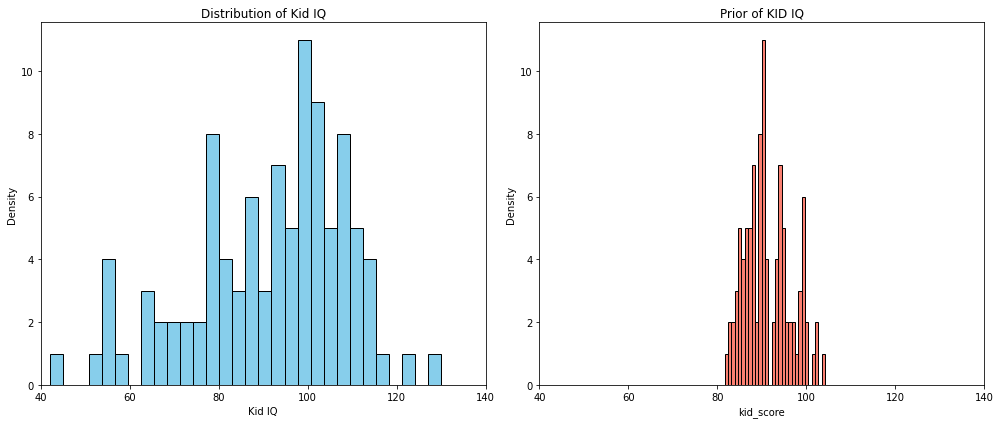

In [867]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(df.kid_score.values, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Kid IQ')
axs[0].set_xlabel('Kid IQ')
axs[0].set_ylabel('Density')
axs[0].set_xlim(40,140)

axs[1].hist(yields_pred_means, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Prior of KID IQ')
axs[1].set_xlabel('kid_score')
axs[1].set_ylabel('Density')
axs[1].set_xlim(40,140)
plt.tight_layout()
plt.show()

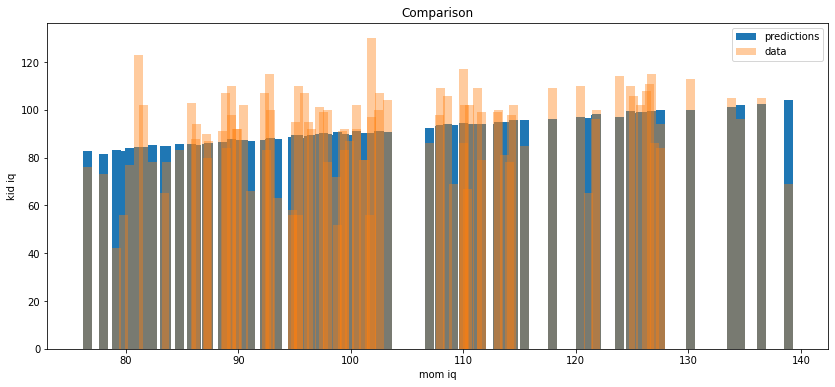

In [868]:
plt.figure(figsize=(14,6))
plt.bar(df.mom_iq.values,yields_pred_means, label="predictions")
plt.bar(df.mom_iq.values,df.kid_score.values, label="data", alpha =0.4)
plt.title("Comparison")
plt.ylabel("kid iq")
plt.xlabel("mom iq")
plt.legend()
plt.show()

Model 2

In [893]:
R = 1000
model_2=CmdStanModel(stan_file='prior2.stan')

model_2_samp = model_2.sample(data = {'N': df.shape[0], 'mom_iq': df["mom_iq"].values, 'mom_hs': df["mom_hs"].values},
                     iter_sampling=R,
                     iter_warmup=1,
                     chains=1,
                     fixed_param=True,
                     seed=1204)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [894]:
yields_pred_prior = model_2_samp.stan_variable("kid_score")
yields_pred_prior_means = np.mean(yields_pred_prior, axis=0)

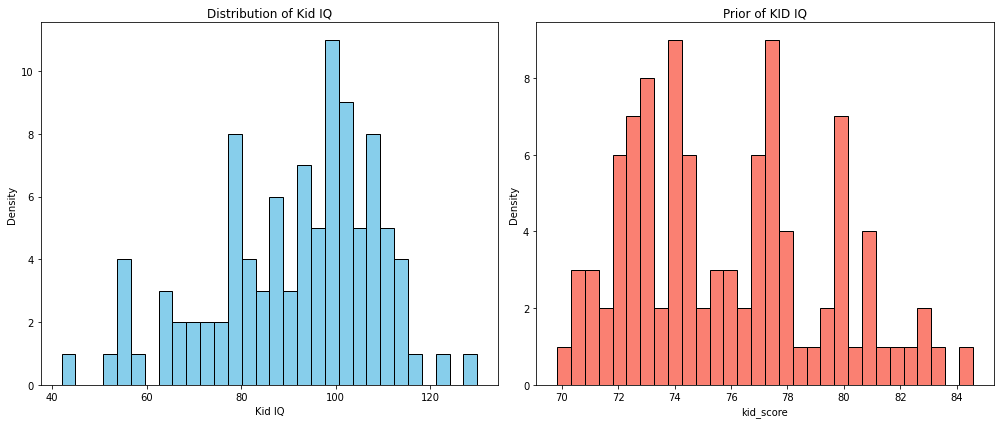

In [895]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(df.kid_score.values, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Kid IQ')
axs[0].set_xlabel('Kid IQ')
axs[0].set_ylabel('Density')

axs[1].hist(yields_pred_prior_means, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Prior of KID IQ')
axs[1].set_xlabel('kid_score')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

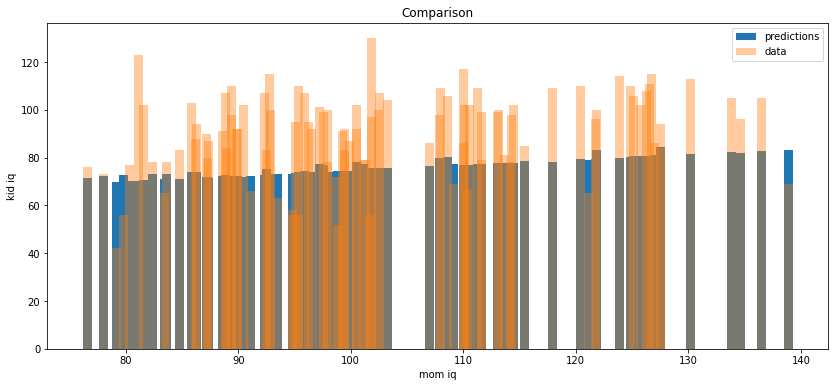

In [896]:
plt.figure(figsize=(14,6))
plt.bar(df.mom_iq.values,yields_pred_prior_means, label="predictions")
plt.bar(df.mom_iq.values,df.kid_score.values, label="data", alpha =0.4)
plt.title("Comparison")
plt.ylabel("kid iq")
plt.xlabel("mom iq")
plt.legend()
plt.show()

In [898]:
R = 1000
model=CmdStanModel(stan_file='model2.stan')

model_2_fit = model.sample(data = {'N': df.shape[0], 'mom_iq': df["mom_iq"].values, 'kid_score': df["kid_score"].values, 'mom_hs': df["mom_hs"].values},
                     iter_sampling=R,
                     chains=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [899]:
yields_pred = model_2_fit.stan_variable("kid_score_pred")
yields_pred_means = np.mean(yields_pred, axis=0)

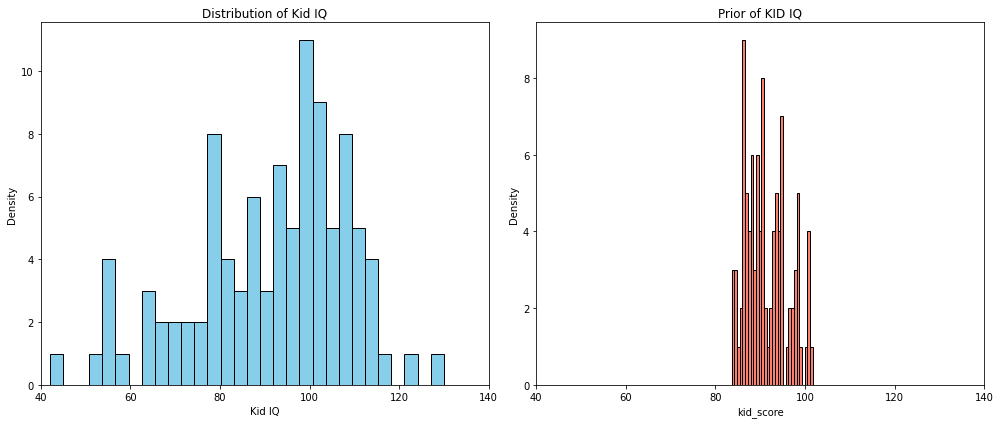

In [900]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(df.kid_score.values, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Kid IQ')
axs[0].set_xlabel('Kid IQ')
axs[0].set_ylabel('Density')
axs[0].set_xlim(40,140)

axs[1].hist(yields_pred_means, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Prior of KID IQ')
axs[1].set_xlabel('kid_score')
axs[1].set_ylabel('Density')
axs[1].set_xlim(40,140)
plt.tight_layout()
plt.show()

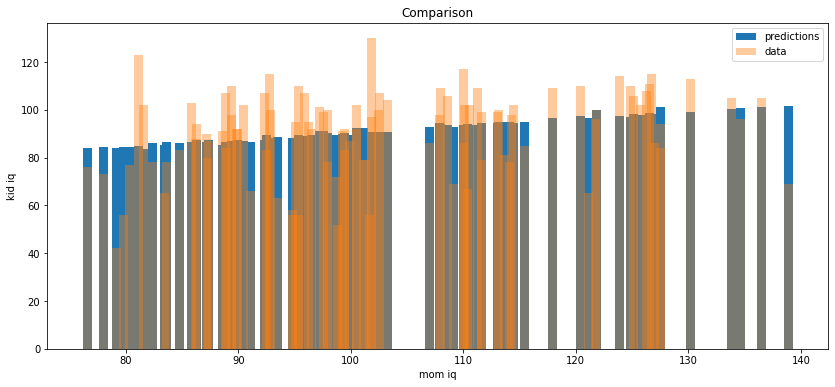

In [901]:
plt.figure(figsize=(14,6))
plt.bar(df.mom_iq.values,yields_pred_means, label="predictions")
plt.bar(df.mom_iq.values,df.kid_score.values, label="data", alpha =0.4)
plt.title("Comparison")
plt.ylabel("kid iq")
plt.xlabel("mom iq")
plt.legend()
plt.show()